In [11]:
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
"""


In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway


In [3]:
"""
Age: The age of the individual, a continuous variable influencing financial stability.
Gender: Gender of the individual, categorized into Male, Female, and Non-binary.
Education Level: Highest level of education achieved, ranging from High School to PhD.
Marital Status: Current marital status, categorized as Single, Married, Divorced, or Widowed.
Income: Annual income in USD, representing the individual's earning capacity. (ingreso)
Credit Score: Numeric value indicating creditworthiness, ranging from 600 to 800.
Loan Amount: The amount of loan requested by the individual, representing financial needs (monto del préstamo).
Loan Purpose: The purpose of the loan, categorized into Home, Auto, Personal, or Business.
Employment Status: Employment situation of the individual, including Employed, Unemployed, or Self-employed.
Years Current Job: Number of years in current job, a continuous variable indicating job stability.
"""

"\nAge: The age of the individual, a continuous variable influencing financial stability.\nGender: Gender of the individual, categorized into Male, Female, and Non-binary.\nEducation Level: Highest level of education achieved, ranging from High School to PhD.\nMarital Status: Current marital status, categorized as Single, Married, Divorced, or Widowed.\nIncome: Annual income in USD, representing the individual's earning capacity. (ingreso)\nCredit Score: Numeric value indicating creditworthiness, ranging from 600 to 800.\nLoan Amount: The amount of loan requested by the individual, representing financial needs (monto del préstamo).\nLoan Purpose: The purpose of the loan, categorized into Home, Auto, Personal, or Business.\nEmployment Status: Employment situation of the individual, including Employed, Unemployed, or Self-employed.\nYears Current Job: Number of years in current job, a continuous variable indicating job stability.\n"

In [4]:
"""
### Variables Continuas
1. Age (Edad)
2. Income (Ingreso)
3. Credit Score (Puntaje crediticio)
4. Loan Amount (Monto del préstamo)
5. Years Current Job (Años en el trabajo actual)

### Variables Categóricas
1. Gender (Género)
2. Education Level (Nivel de educación)
3. Marital Status (Estado civil)
4. Loan Purpose (Propósito del préstamo)
5. Employment Status (Situación laboral)
"""

'\n### Variables Continuas\n1. Age (Edad)\n2. Income (Ingreso)\n3. Credit Score (Puntaje crediticio)\n4. Loan Amount (Monto del préstamo)\n5. Years Current Job (Años en el trabajo actual)\n\n### Variables Categóricas\n1. Gender (Género)\n2. Education Level (Nivel de educación)\n3. Marital Status (Estado civil)\n4. Loan Purpose (Propósito del préstamo)\n5. Employment Status (Situación laboral)\n'

In [5]:
#Lectura de la base de datos
data = pd.read_csv('financial_risk_assessment.csv')
#Imprimir las primeras 5 filas y las últimas 5 filas
data

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [6]:
#Imprimir la información de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [7]:
#Imprimir estadísticas descriptivas de la base de datos
data.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [8]:
#Imprimir la cantidad de valores nulos en la base de datos
data.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [9]:
# Imputación de valores nulos
imputer = SimpleImputer(strategy='mean')
data['Income'] = imputer.fit_transform(data[['Income']])
data['Credit Score'] = imputer.fit_transform(data[['Credit Score']])
data['Loan Amount'] = imputer.fit_transform(data[['Loan Amount']])
data['Assets Value'] = imputer.fit_transform(data[['Assets Value']])
data['Number of Dependents'] = imputer.fit_transform(data[['Number of Dependents']])
data['Previous Defaults'] = imputer.fit_transform(data[['Previous Defaults']])

#Codificación de variables categóricas
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Education Level'] = le.fit_transform(data['Education Level'])
data['Marital Status'] = le.fit_transform(data['Marital Status'])
data['Loan Purpose'] = le.fit_transform(data['Loan Purpose'])
data['Employment Status'] = le.fit_transform(data['Employment Status'])

In [10]:
#Revisión de los valores nulos:
data.isnull().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

In [11]:
#Revisión de los valores únicos:
data.nunique()

Age                         52
Gender                       3
Education Level              4
Marital Status               4
Income                   11958
Credit Score               201
Loan Amount              11089
Loan Purpose                 4
Employment Status            3
Years at Current Job        20
Payment History              4
Debt-to-Income Ratio     15000
Assets Value             12471
Number of Dependents         6
City                     10614
State                       59
Country                    243
Previous Defaults            6
Marital Status Change        3
Risk Rating                  3
dtype: int64

In [13]:
#Nombres de columnas:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

In [14]:
scaler = StandardScaler()
data[['Income', 'Loan Amount', 'Credit Score', 'Age', 'Years Current Job']] = scaler.fit_transform(data[['Income', 'Loan Amount', 'Credit Score', 'Age', 'Years at Current Job']])

In [15]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

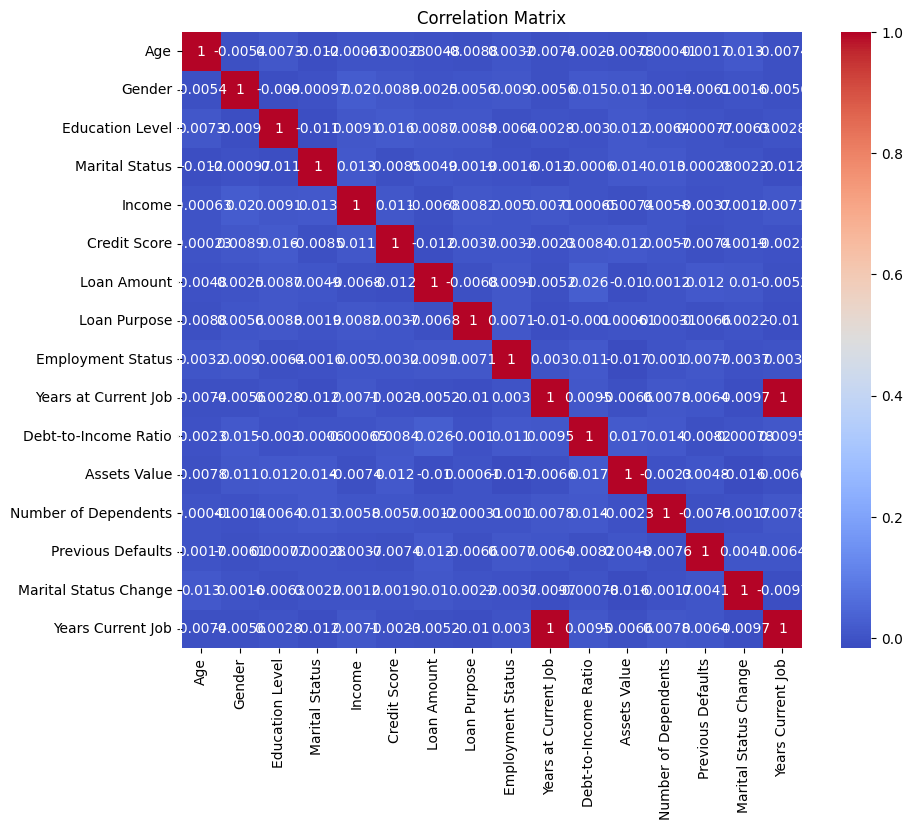

In [18]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

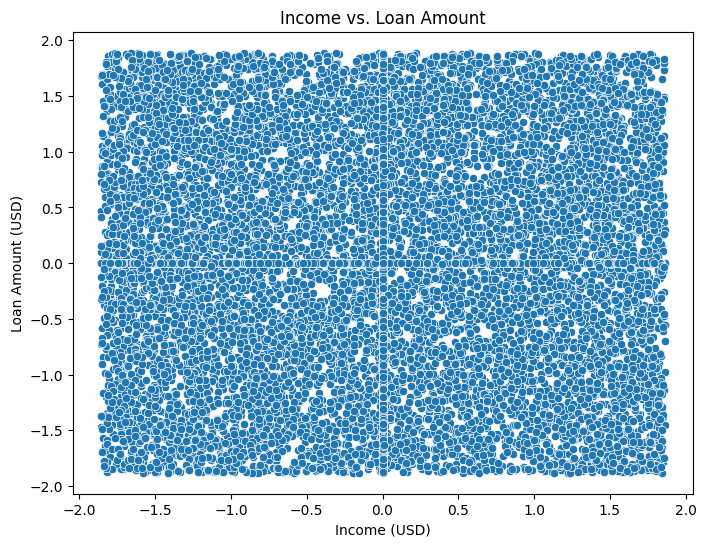

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Loan Amount', data=data)
plt.title('Income vs. Loan Amount')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Amount (USD)')
plt.show()

"""
. Income vs. Loan Amount
Pregunta: ¿Cómo se relaciona el ingreso con el monto del préstamo solicitado?
Análisis: Graficar la relación entre el ingreso y el monto del préstamo utilizando 
un scatter plot o boxplot.
"""


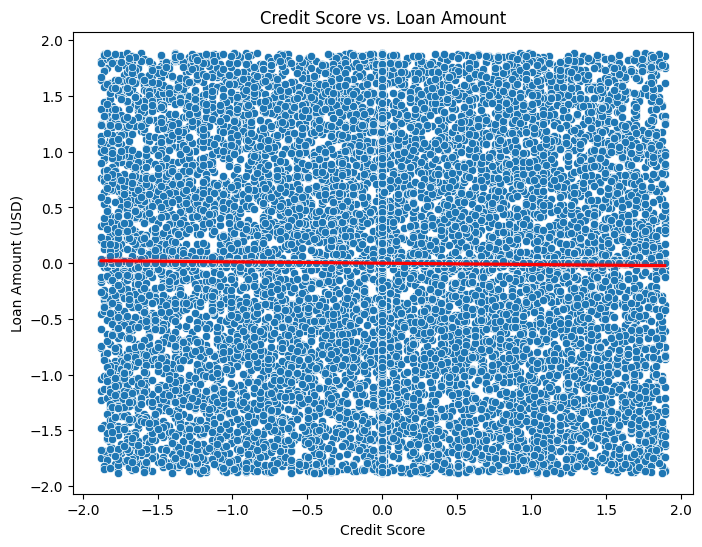

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit Score', y='Loan Amount', data=data)
sns.regplot(x='Credit Score', y='Loan Amount', data=data, scatter=False, color='red')
plt.title('Credit Score vs. Loan Amount')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount (USD)')
plt.show()
"""
Pregunta: ¿Un mayor puntaje de crédito se asocia con préstamos más grandes?
Análisis: Crear un scatter plot para visualizar esta relación y usar una regresión 
lineal para ver la tendencia.
"""

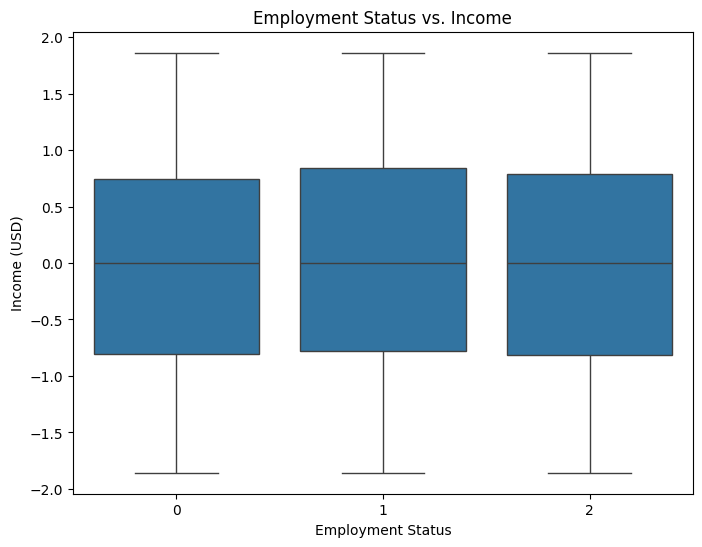

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Employment Status', y='Income', data=data)
plt.title('Employment Status vs. Income')
plt.xlabel('Employment Status')
plt.ylabel('Income (USD)')
plt.show()

"""
Pregunta: ¿Cómo varía el ingreso según la situación laboral?
Análisis: Utilizar un boxplot para visualizar la distribución de los 
ingresos según el estado laboral.
"""


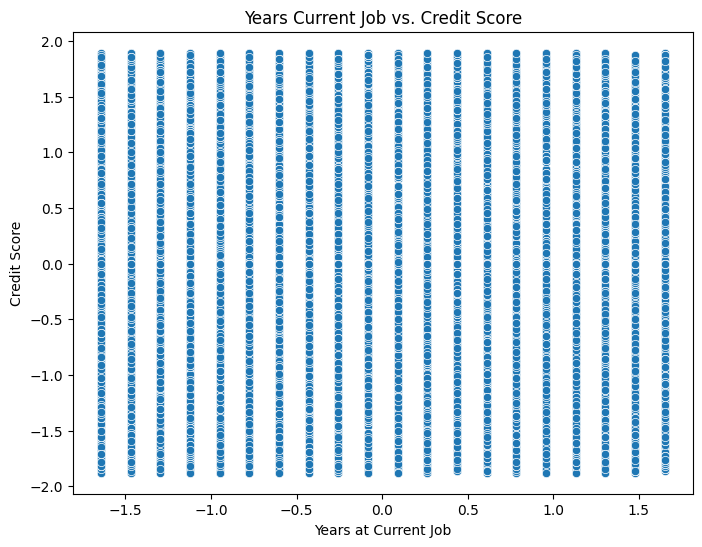

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years Current Job', y='Credit Score', data=data)
plt.title('Years Current Job vs. Credit Score')
plt.xlabel('Years at Current Job')
plt.ylabel('Credit Score')
plt.show()
"""
Pregunta: ¿Las personas que llevan más años en su trabajo tienen un mejor puntaje crediticio?
Análisis: Usar un scatter plot o un boxplot para ver si existe una correlación positiva 
entre los años en el trabajo y el puntaje de crédito.
"""

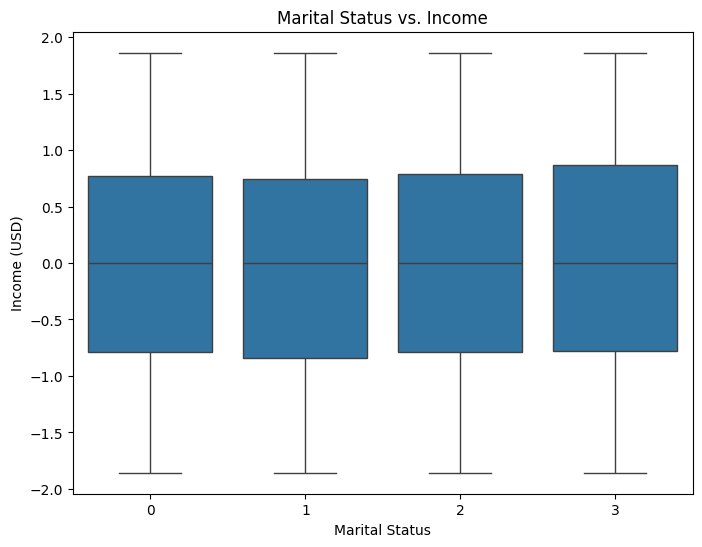

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital Status', y='Income', data=data)
plt.title('Marital Status vs. Income')
plt.xlabel('Marital Status')
plt.ylabel('Income (USD)')
plt.show()

"""
Pregunta: ¿Las personas casadas tienen mayores ingresos en comparación con las 
solteras, divorciadas o viudas?
Análisis: Usar un boxplot para comparar los ingresos entre los diferentes estados civiles.
"""


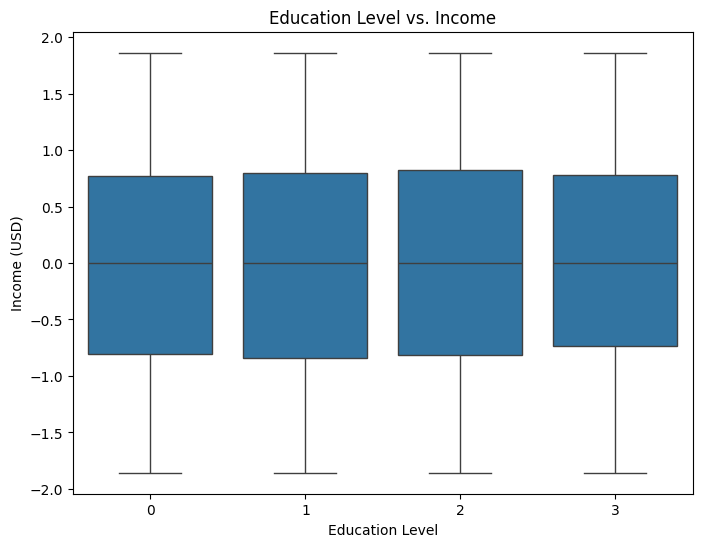

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education Level', y='Income', data=data)
plt.title('Education Level vs. Income')
plt.xlabel('Education Level')
plt.ylabel('Income (USD)')
plt.show()

"""
Pregunta: ¿El nivel educativo más alto está asociado con ingresos más altos?
Análisis: Crear un boxplot para mostrar la distribución de los ingresos según 
el nivel educativo.
"""


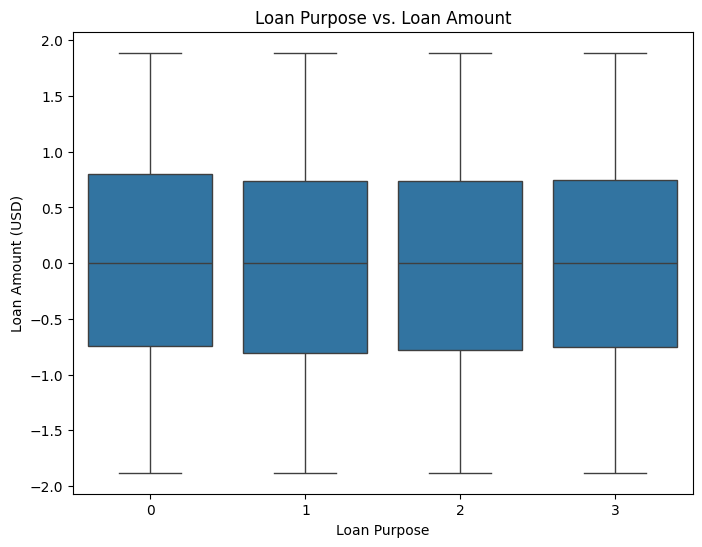

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Purpose', y='Loan Amount', data=data)
plt.title('Loan Purpose vs. Loan Amount')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount (USD)')
plt.show()

"""
Pregunta: ¿El propósito del préstamo influye en el monto solicitado?
Análisis: Usar un boxplot para comparar el monto del préstamo entre diferentes propósitos.
"""


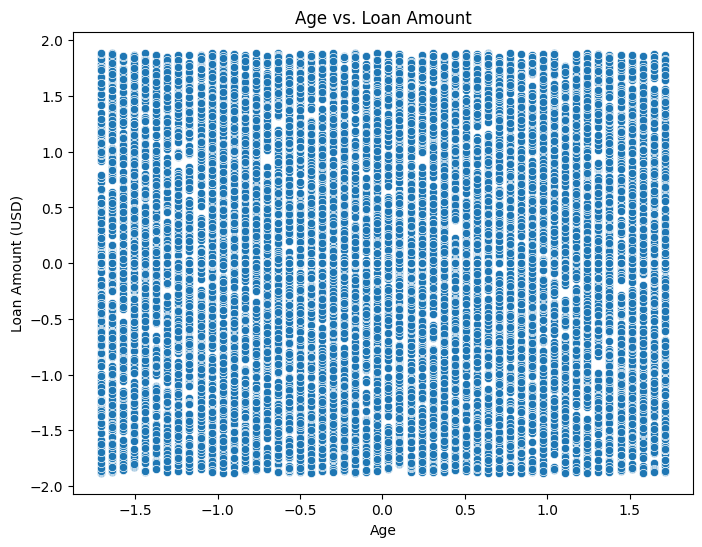

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Loan Amount', data=data)
plt.title('Age vs. Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount (USD)')
plt.show()

"""
Pregunta: ¿El puntaje de crédito está relacionado con los ingresos?
Análisis: Crear un scatter plot con una regresión lineal para ver la 
correlación entre puntaje de crédito e ingresos.
"""


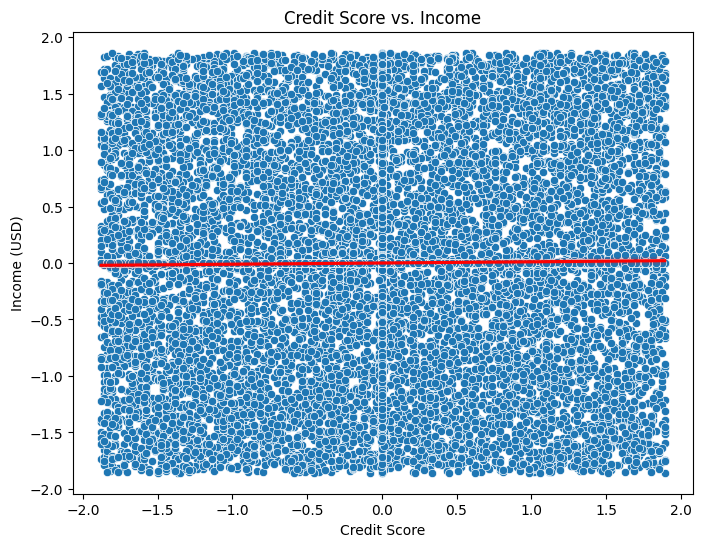

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit Score', y='Income', data=data)
sns.regplot(x='Credit Score', y='Income', data=data, scatter=False, color='red')
plt.title('Credit Score vs. Income')
plt.xlabel('Credit Score')
plt.ylabel('Income (USD)')
plt.show()


              City  Loan Amount
0   Port Elizabeth     1.529719
1  North Catherine     0.534811
2      South Scott     0.768335
3       Robinhaven    -0.076139
4      New Heather     0.760378


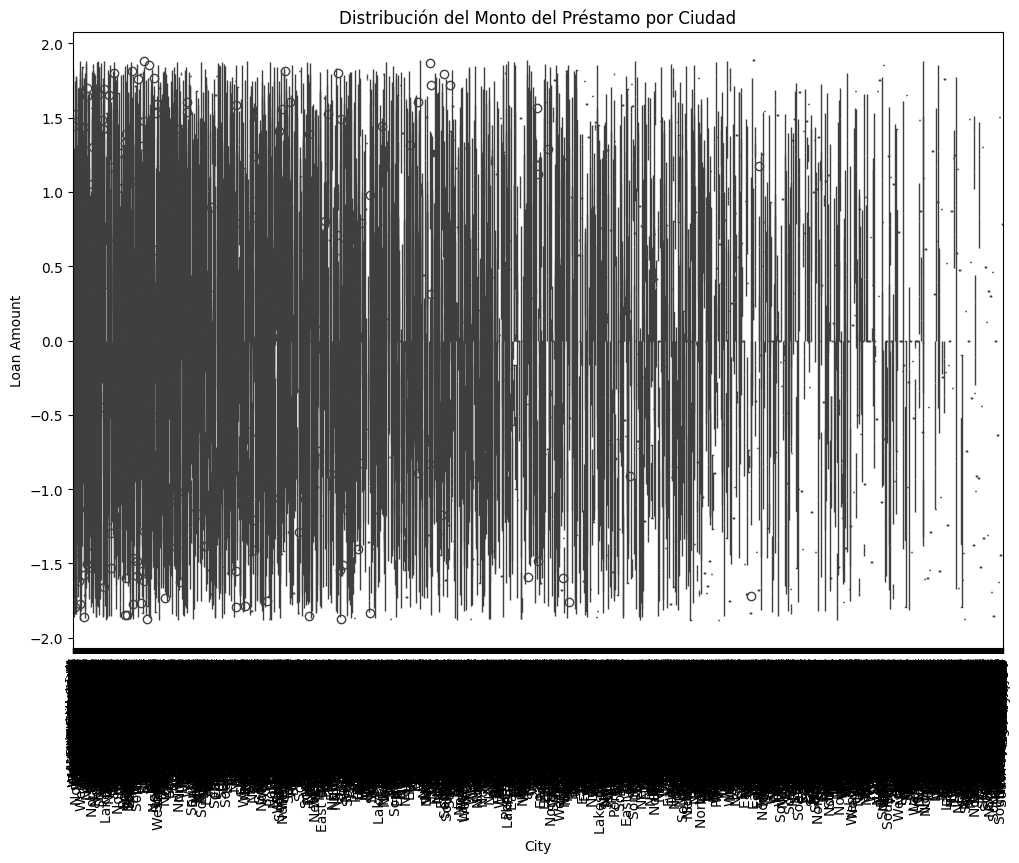

In [40]:
# Asegúrate de que la columna 'City' o 'State' existe en tus datos
# Verifica los primeros valores
print(data[['City', 'Loan Amount']].head())

# Gráfico de caja para visualizar la distribución del monto del préstamo por ciudad o estado
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Loan Amount', data=data)
plt.title('Distribución del Monto del Préstamo por Ciudad')
plt.xticks(rotation=90)  # Rotar etiquetas para mayor legibilidad si hay muchas ciudades
plt.show()


In [4]:

data = pd.read_csv('financial_risk_assessment.csv')
# Agrupar los datos por ciudad
cities = data['City'].unique()
loan_amounts = [data[data['City'] == city]['Loan Amount'] for city in cities]

# Realizar ANOVA
anova_result = f_oneway(*loan_amounts)
print("Resultado del ANOVA:", anova_result)


Resultado del ANOVA: F_onewayResult(statistic=nan, pvalue=nan)
